In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scrublet as scr
import celltypist
from celltypist import models
import decoupler as dc
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(dpi=150)

# Import raw files

In [2]:
inpath="/home/lugli/spuccio/Projects/SP039/FileH5AD_input/"

In [3]:
GLIO1_T = sc.read(inpath+"GLIO1_T.h5ad")
GLIO2_T = sc.read(inpath+"GLIO2_T.h5ad")
GLIO3_T = sc.read(inpath+"GLIO3_T.h5ad")
GLIO4_T = sc.read(inpath+"GLIO4_T.h5ad")
GLIO5_T = sc.read(inpath+"GLIO5_T.h5ad")
GLIO6_T = sc.read(inpath+"GLIO6_T.h5ad")
GLIO7_T = sc.read(inpath+"GLIO7_T.h5ad")

# Read Metadata

In [4]:
metadata = pd.read_excel('Metadata2.xlsx')

In [5]:
metadata['Sample'] =   [ 'Patient' + str(col) for col in metadata.Sample]

In [6]:
metadata.head(50)

SampleID       GEO_RNA           Cohort          Type  \
0              PJ048    GSM2940098        GSE103224  PrimaryTumor   
1              PJ030    GSM2758475        GSE103224  PrimaryTumor   
2              PJ025    GSM2758474        GSE103224  PrimaryTumor   
3              PJ018    GSM2758473        GSE103224  PrimaryTumor   
4              PJ017    GSM2758472        GSE103224  PrimaryTumor   
5              PJ016    GSM2758472        GSE103224  PrimaryTumor   
6             MGH102  NotAvailable        GSE131928  PrimaryTumor   
7             MGH105  NotAvailable        GSE131928  PrimaryTumor   
8             MGH115  NotAvailable        GSE131928  PrimaryTumor   
9             MGH124  NotAvailable        GSE131928  PrimaryTumor   
10            MGH125  NotAvailable        GSE131928  PrimaryTumor   
11            MGH126  NotAvailable        GSE131928  PrimaryTumor   
12               ND1  NotAvailable        GSE163120  PrimaryTumor   
13               ND2  NotAvailable        GSE163120  PrimaryTumor   
14               ND3  NotAvailable        GSE163120  PrimaryTumor   
15               ND4  NotAvailable        GSE163120  PrimaryTumor   
16               ND5  NotAvailable        GSE163120  PrimaryTumor   
17               ND6  NotAvailable        GSE163120  PrimaryTumor   
18              NS02    GSM3827162        GSE131907    Metastasis   
19              NS03    GSM3827163        GSE131907    Metastasis   
20              NS04    GSM3827164        GSE131907    Metastasis   
21              NS06    GSM3827165        GSE131907    Metastasis   
22              NS07    GSM3827166        GSE131907    Metastasis   
23              NS12    GSM3827167        GSE131907    Metastasis   
24              NS13    GSM3827168        GSE131907    Metastasis   
25              NS16    GSM3827169        GSE131907    Metastasis   
26              NS17    GSM3827170        GSE131907    Metastasis   
27              NS19    GSM3827171        GSE131907    Metastasis   
28           GLIO1_T  NotAvailable  InternalCohort2  PrimaryTumor   
29           GLIO2_T  NotAvailable  InternalCohort2  PrimaryTumor   
30           GLIO3_T  NotAvailable  InternalCohort2  PrimaryTumor   
31           GLIO4_T  NotAvailable  InternalCohort2  PrimaryTumor   
32           GLIO5_T  NotAvailable  InternalCohort2  PrimaryTumor   
33           GLIO6_T  NotAvailable  InternalCohort2  PrimaryTumor   
34           GLIO7_T  NotAvailable  InternalCohort2  PrimaryTumor   
35         Ovarian_2    GSM5645898        GSE186344    Metastasis   
36          Breast_2    GSM5645892        GSE186344    Metastasis   
37           Melan_3    GSM5645890        GSE186344    Metastasis   
38            Lung_1    GSM5645894        GSE186344    Metastasis   
39            Lung_2    GSM5645895        GSE186344    Metastasis   
40            Lung_3    GSM5645896        GSE186344    Metastasis   
41        Renal_Cell    GSM5645902        GSE186344    Metastasis   
42         Ovarian_1    GSM5645897        GSE186344    Metastasis   
43        Colorectal    GSM5645900        GSE186344    Metastasis   
44           Melan_2    GSM5645889        GSE186344    Metastasis   
45           Melan_1    GSM5645888        GSE186344    Metastasis   
46  KSO07_BRM112_GEX  NotAvailable  InternalCohort1    Metastasis   
47  KSO07_BRM125_GEX  NotAvailable  InternalCohort1    Metastasis   
48  KSO07_BrM138_GEX  NotAvailable  InternalCohort1    Metastasis   
49  KSO07_BRM139_GEX  NotAvailable  InternalCohort1    Metastasis   

         Subtype               Diagnosis         Grade              Location  \
0      Proneural            Glioblastoma            IV        Right_Parietal   
1      Classical  Anaplastic_Astrocytoma           III         Left_Temporal   
2      Classical            Glioblastoma            IV         Right_Frontal   
3      Proneural            Glioblastoma            IV         Left_Temporal   
4    Mesenchymal            Glioblastoma            IV         Left_Temporal   
5      Prone

# Fix Metadata 

In [7]:
tmp1 = metadata.loc[metadata['SampleID'] == "GLIO1_T"].loc[metadata.loc[metadata['SampleID'] == "GLIO1_T"].index.repeat(GLIO1_T.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "GLIO1_T-" + tmp1.index.astype(str),inplace=True) 
GLIO1_T.obs = tmp1

In [8]:
tmp1 = metadata.loc[metadata['SampleID'] == "GLIO2_T"].loc[metadata.loc[metadata['SampleID'] == "GLIO2_T"].index.repeat(GLIO2_T.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "GLIO2_T-" + tmp1.index.astype(str),inplace=True) 
GLIO2_T.obs = tmp1

In [9]:
tmp1 = metadata.loc[metadata['SampleID'] == "GLIO3_T"].loc[metadata.loc[metadata['SampleID'] == "GLIO3_T"].index.repeat(GLIO3_T.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "GLIO3_T-" + tmp1.index.astype(str),inplace=True) 
GLIO3_T.obs = tmp1

In [10]:
tmp1 = metadata.loc[metadata['SampleID'] == "GLIO4_T"].loc[metadata.loc[metadata['SampleID'] == "GLIO4_T"].index.repeat(GLIO4_T.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "GLIO4_T-" + tmp1.index.astype(str),inplace=True) 
GLIO4_T.obs = tmp1

In [11]:
tmp1 = metadata.loc[metadata['SampleID'] == "GLIO5_T"].loc[metadata.loc[metadata['SampleID'] == "GLIO5_T"].index.repeat(GLIO5_T.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "GLIO5_T-" + tmp1.index.astype(str),inplace=True) 
GLIO5_T.obs = tmp1

In [12]:
tmp1 = metadata.loc[metadata['SampleID'] == "GLIO6_T"].loc[metadata.loc[metadata['SampleID'] == "GLIO6_T"].index.repeat(GLIO6_T.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "GLIO6_T-" + tmp1.index.astype(str),inplace=True) 
GLIO6_T.obs = tmp1

In [13]:
tmp1 = metadata.loc[metadata['SampleID'] == "GLIO7_T"].loc[metadata.loc[metadata['SampleID'] == "GLIO7_T"].index.repeat(GLIO7_T.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "GLIO7_T-" + tmp1.index.astype(str),inplace=True) 
GLIO7_T.obs = tmp1

# Concatenate 

In [15]:
GLIO1_T.var_names_make_unique()
GLIO2_T.var_names_make_unique()
GLIO3_T.var_names_make_unique()
GLIO4_T.var_names_make_unique()
GLIO5_T.var_names_make_unique()
GLIO6_T.var_names_make_unique()
GLIO7_T.var_names_make_unique()

In [16]:
adata = GLIO1_T.concatenate(GLIO2_T,GLIO3_T,GLIO4_T,GLIO5_T,GLIO6_T,GLIO7_T,
                         index_unique=None)

In [17]:
del(GLIO1_T,GLIO2_T,GLIO3_T,GLIO4_T,GLIO5_T,GLIO6_T,GLIO7_T)

In [18]:
print(adata.obs['SampleID'].value_counts())
adata

GLIO4_T    9212
GLIO2_T    6741
GLIO3_T    4985
GLIO5_T    4553
GLIO7_T    4530
GLIO6_T    3014
GLIO1_T    1557
Name: SampleID, dtype: int64


AnnData object with n_obs × n_vars = 34592 × 33538
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch'
    var: 'ENSGeneID', 'GeneTemp-6', 'GeneTempClean-6'

In [19]:
adata.layers['raw'] = adata.X 

# Calculate QC

In [20]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

In [21]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [22]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mt2'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [23]:
adata

AnnData object with n_obs × n_vars = 34592 × 33538
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'ENSGeneID', 'GeneTemp-6', 'GeneTempClean-6', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'raw'

# Plot QC

... storing 'SampleID' as categorical
... storing 'GEO_RNA' as categorical
... storing 'Cohort' as categorical
... storing 'Type' as categorical
... storing 'Subtype' as categorical
... storing 'Diagnosis' as categorical
... storing 'Grade' as categorical
... storing 'Location' as categorical
... storing 'IDH1_Status' as categorical
... storing 'EGFR_Status' as categorical
... storing 'MGMT' as categorical
... storing 'Sample' as categorical
... storing 'Sex' as categorical
... storing 'Age' as categorical
... storing 'Sorted' as categorical
... storing 'MET' as categorical


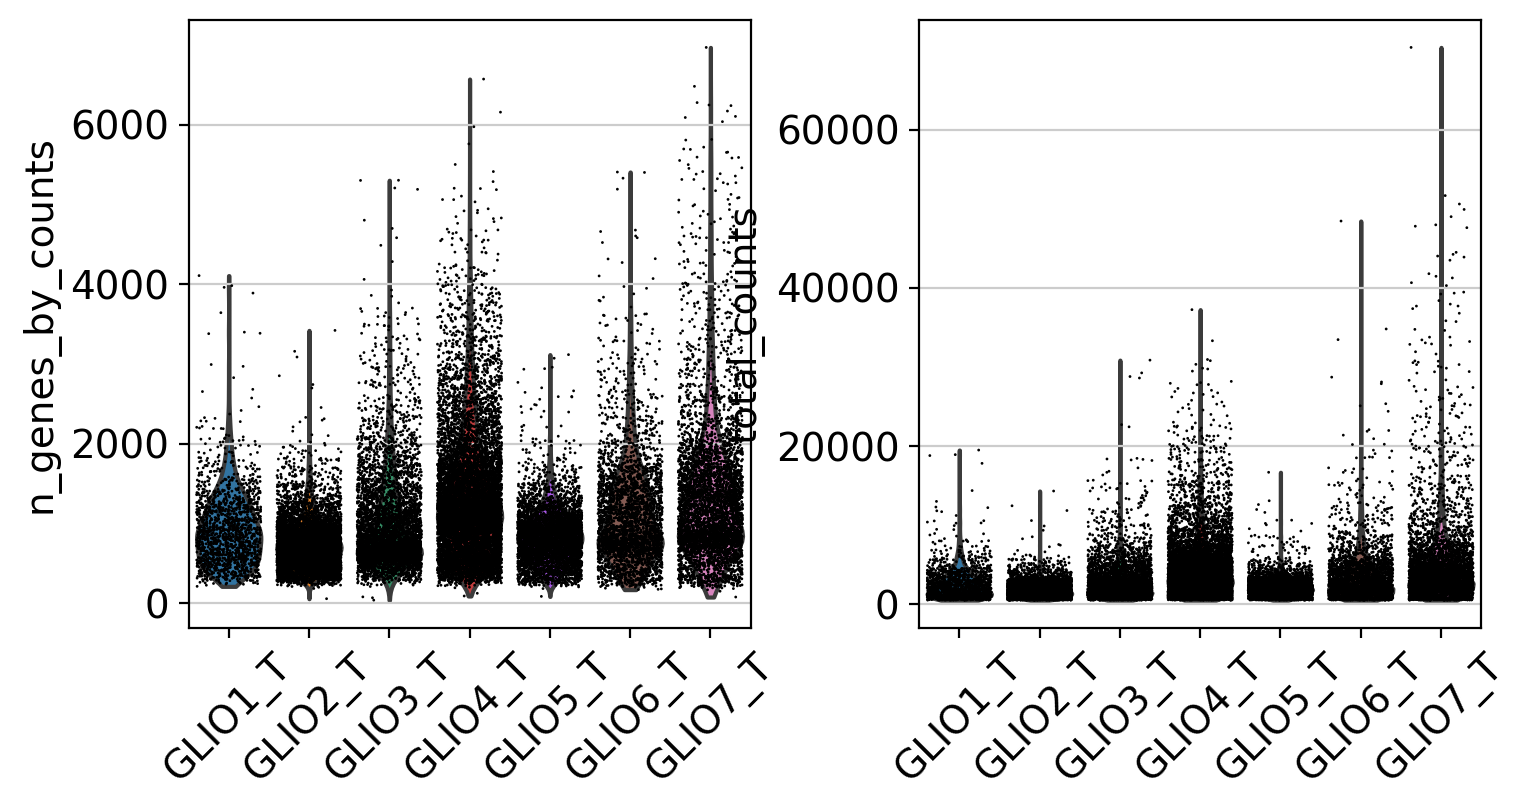

In [24]:
sc.set_figure_params(dpi=100)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

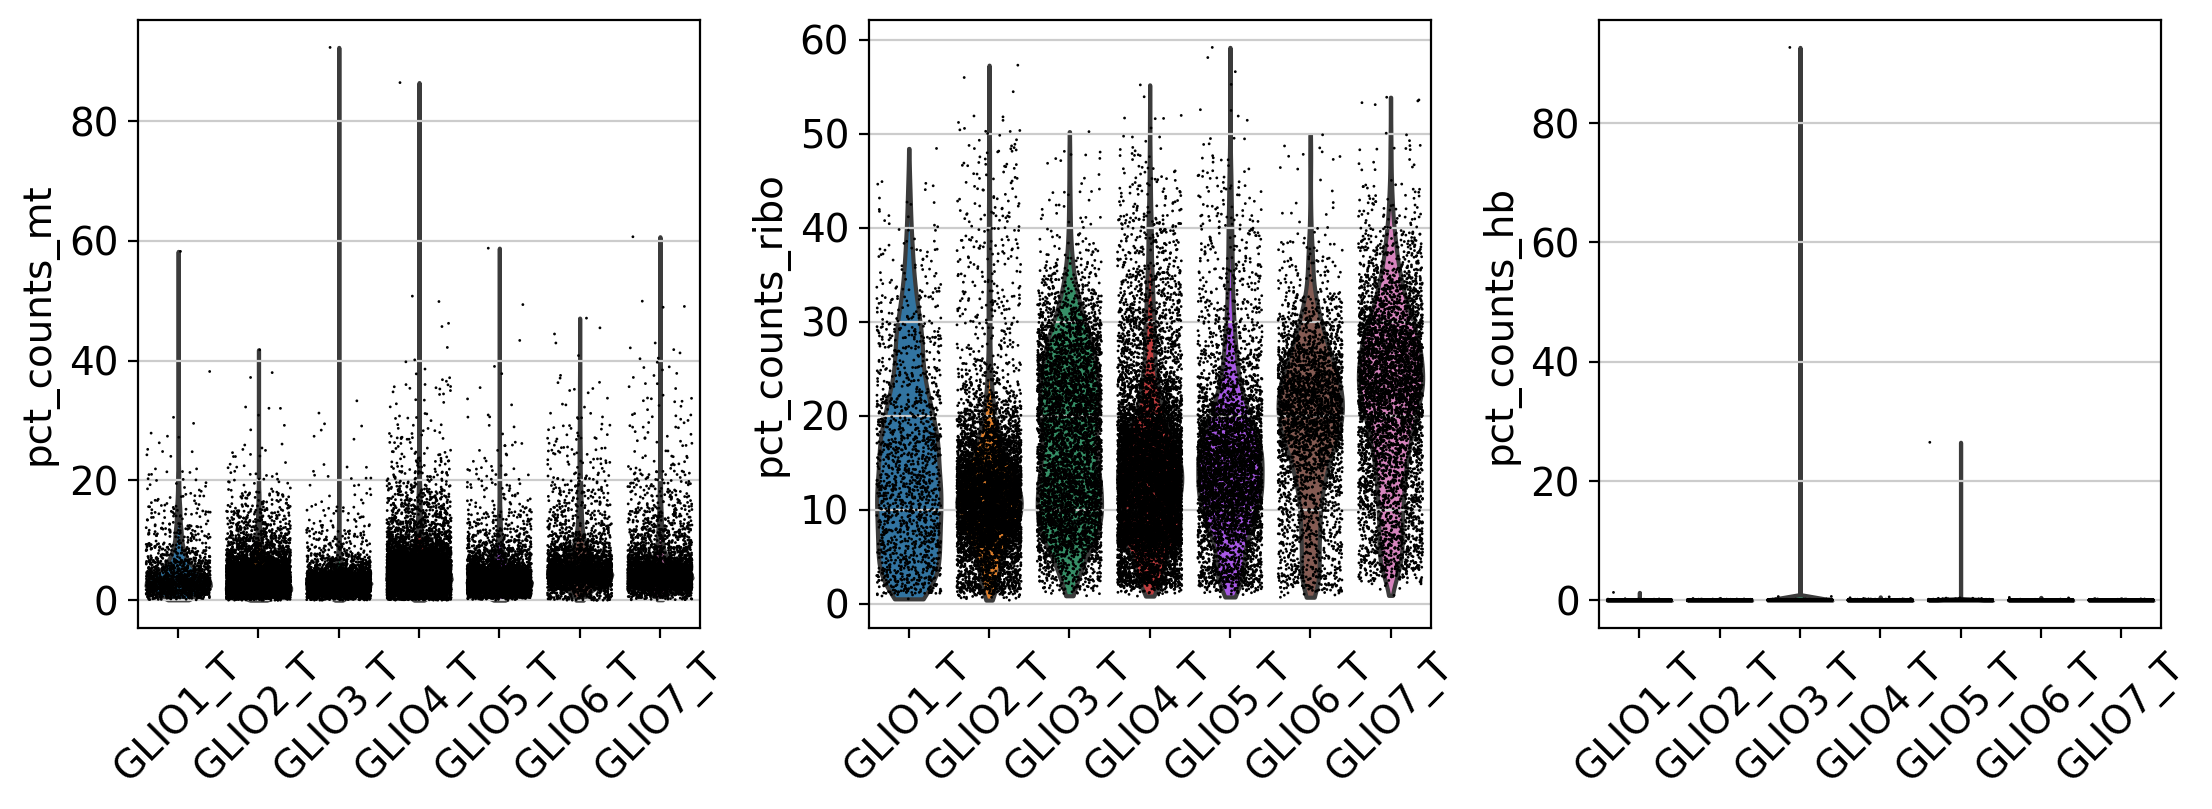

In [25]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

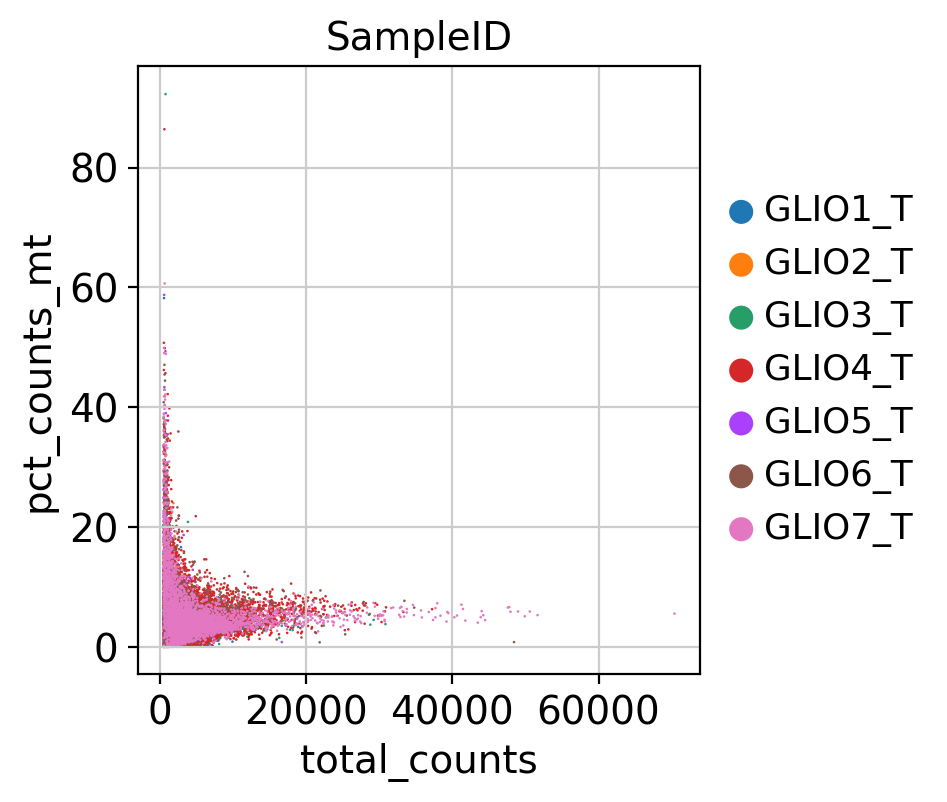

In [26]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="SampleID")

# Filtering

In [27]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

34565 22432


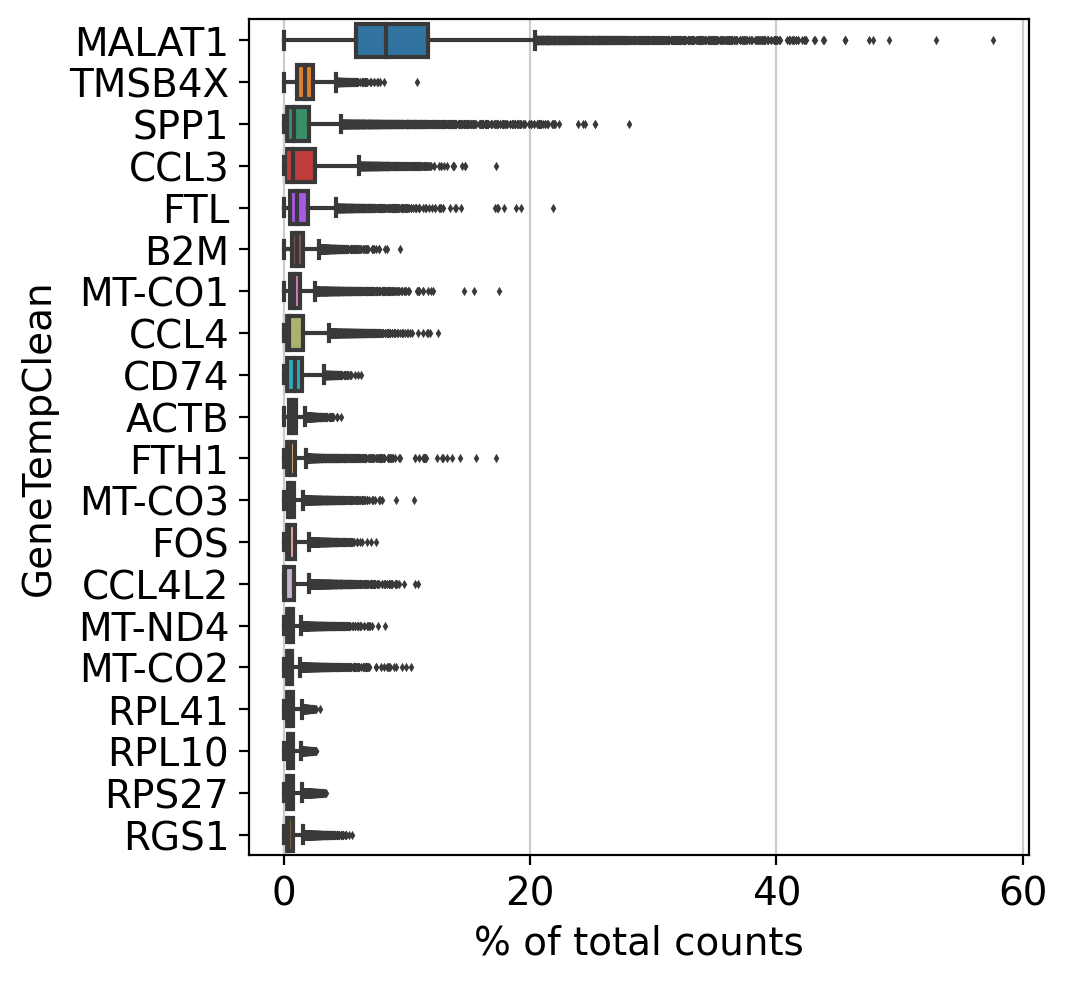

In [28]:
sc.pl.highest_expr_genes(adata, n_top=20)

# Mito/Ribo filtering

In [29]:
adata = adata[adata.obs['pct_counts_mt'] < 20, :]

# filter for percent ribo > 0.05
adata = adata[adata.obs['pct_counts_ribo'] > 5, :]
adata = adata[adata.obs['pct_counts_hb'] < 2, :]
print("Remaining cells %d"%adata.n_obs)

Remaining cells 31708


# Plot filtered QC

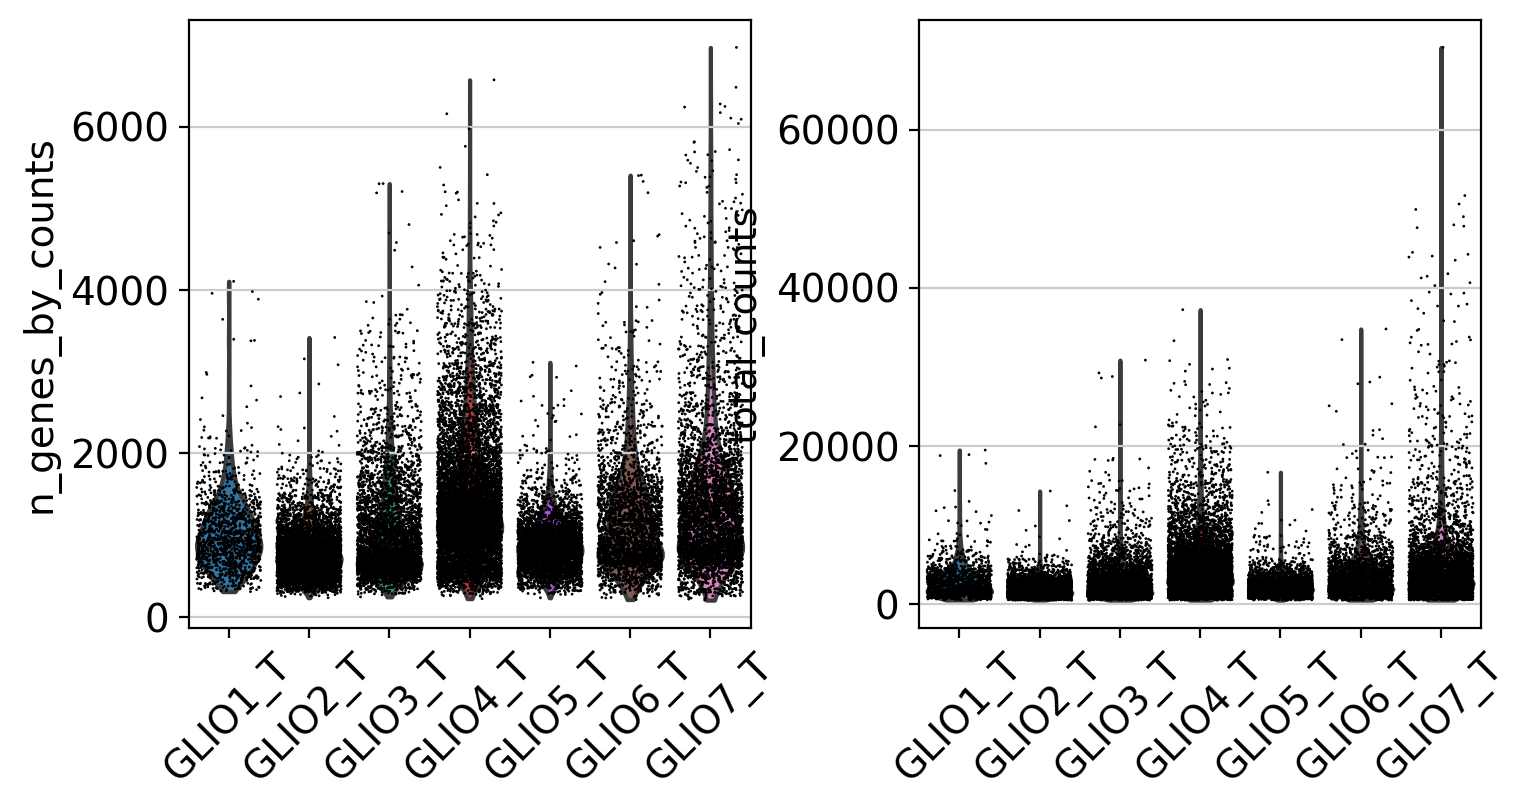

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

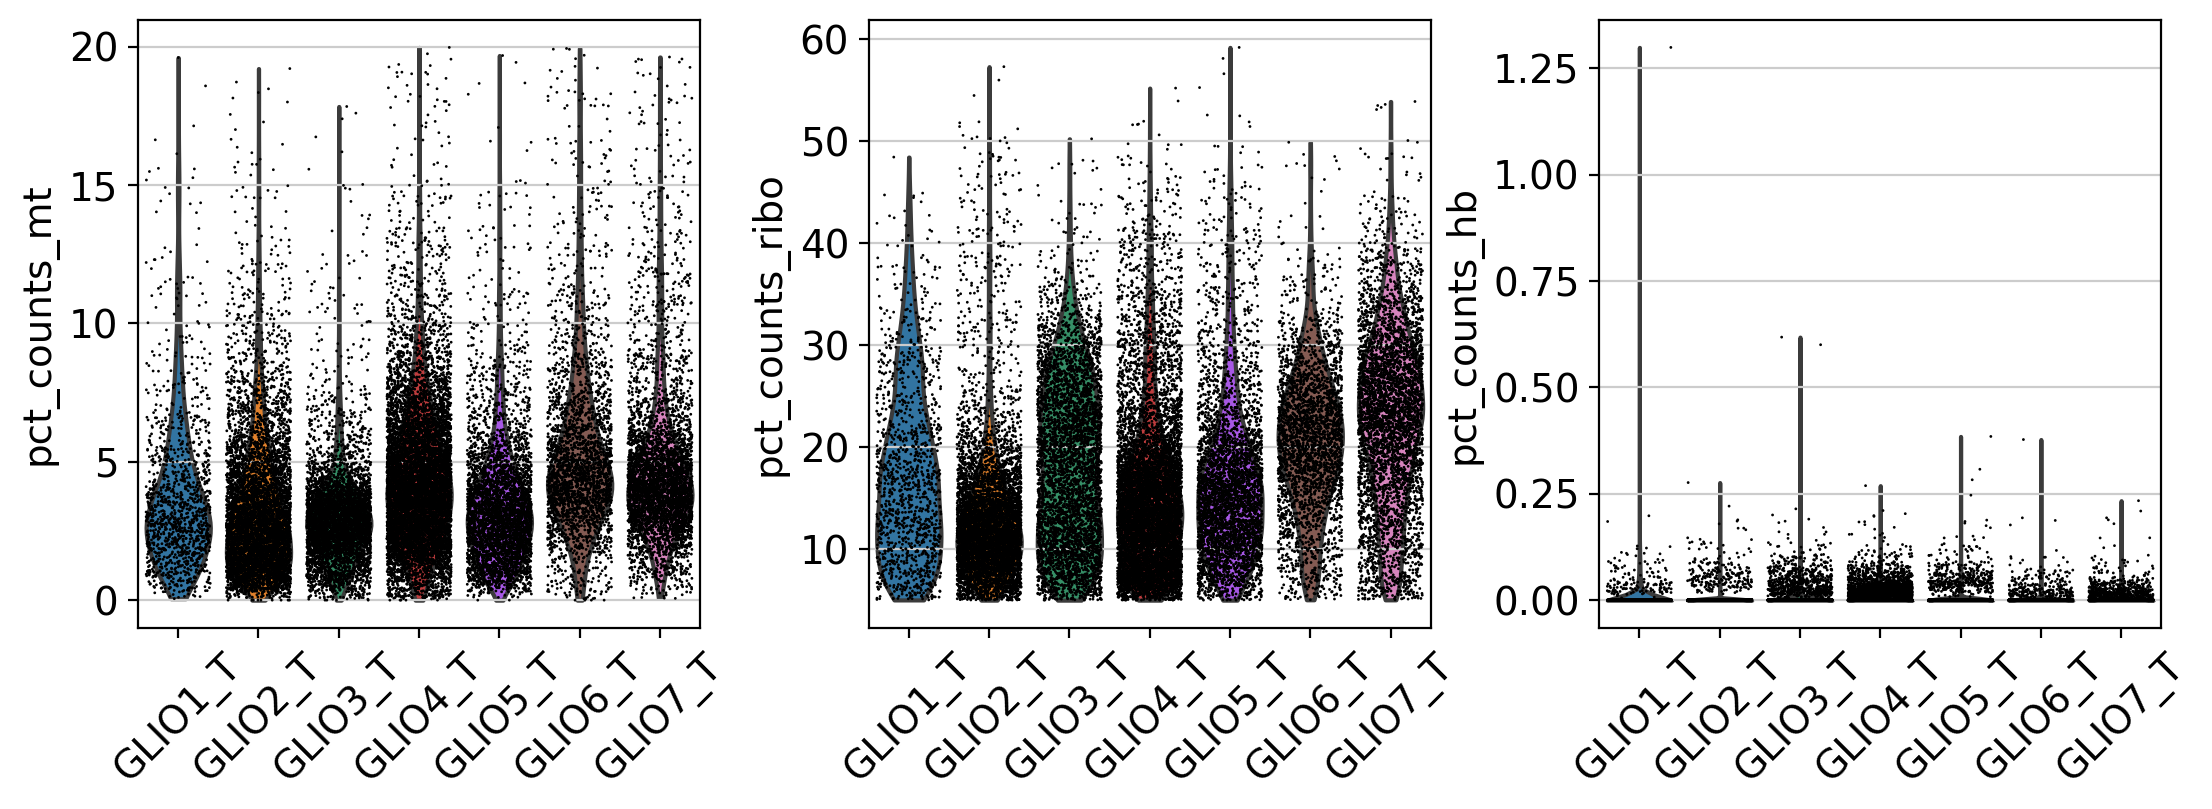

In [31]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

# Filter genes

In [32]:
mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")

In [33]:
mito_gene_indicator = np.in1d(adata.var_names, mito_gene_names)

In [34]:
adata = adata[:, ~mito_gene_indicator]

In [35]:
print(adata.n_obs, adata.n_vars)
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
ribo_genes = adata.var_names.str.startswith(("RPL","RPS"))
hb_genes = adata.var_names.str.contains('^HB[^(P)]')

remove = np.add(ribo_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

31708 22419
31708 22310


# Calculate cell-cycle scores

In [36]:
cell_cycle_genes = [x.strip() for x in open('/home/lugli/spuccio/Projects/SP035_TregIntegration/Analysis/regev_lab_cell_cycle_genes_homo.txt')]
print(len(cell_cycle_genes))
# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

90
90


In [37]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

... storing 'phase' as categorical


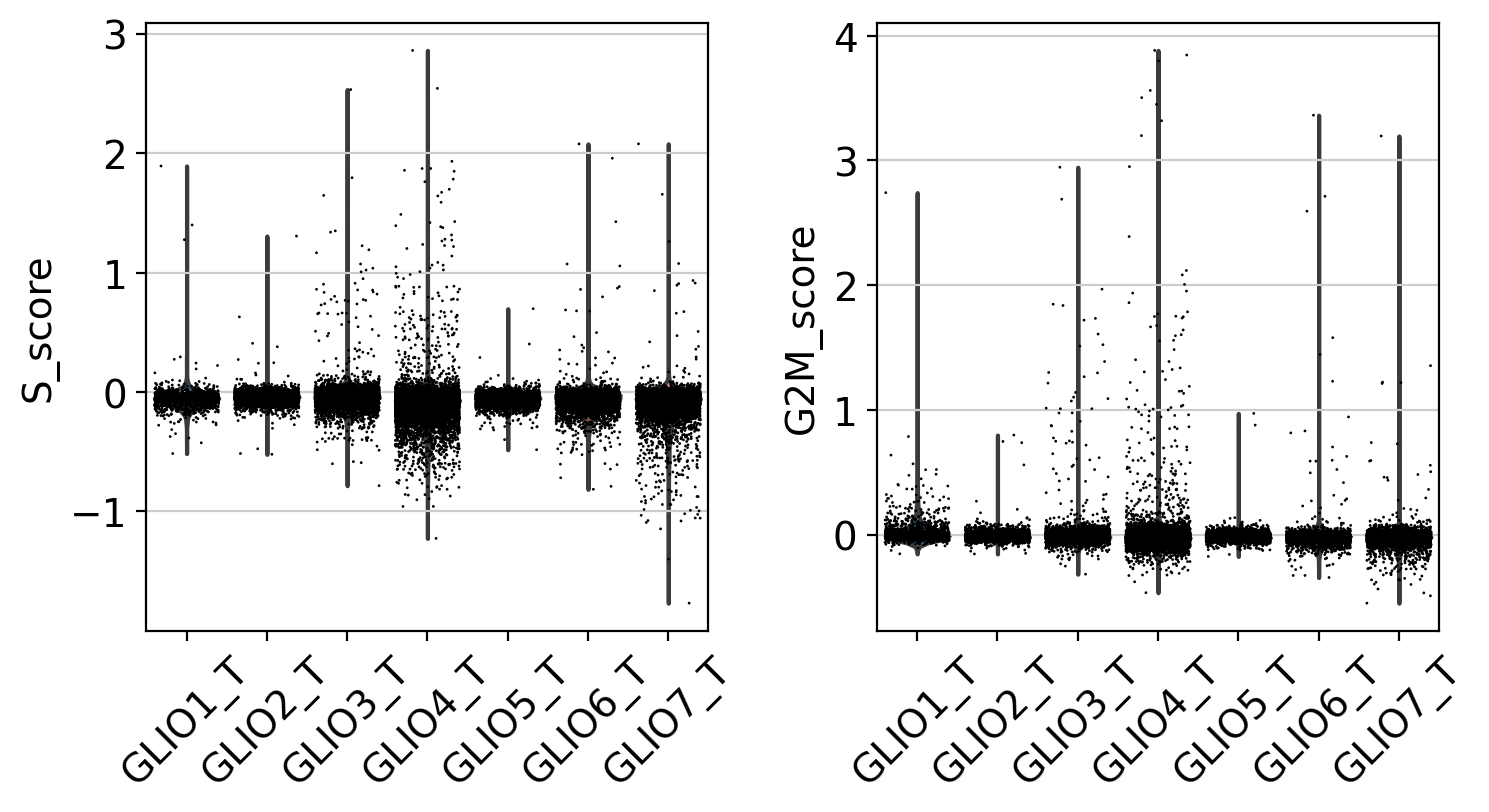

In [38]:
sc.pl.violin(adata, ['S_score', 'G2M_score'],
             jitter=0.4, groupby = 'SampleID', rotation=45)

# Predict doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.86
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.8%
Elapsed time: 36.3 seconds


2

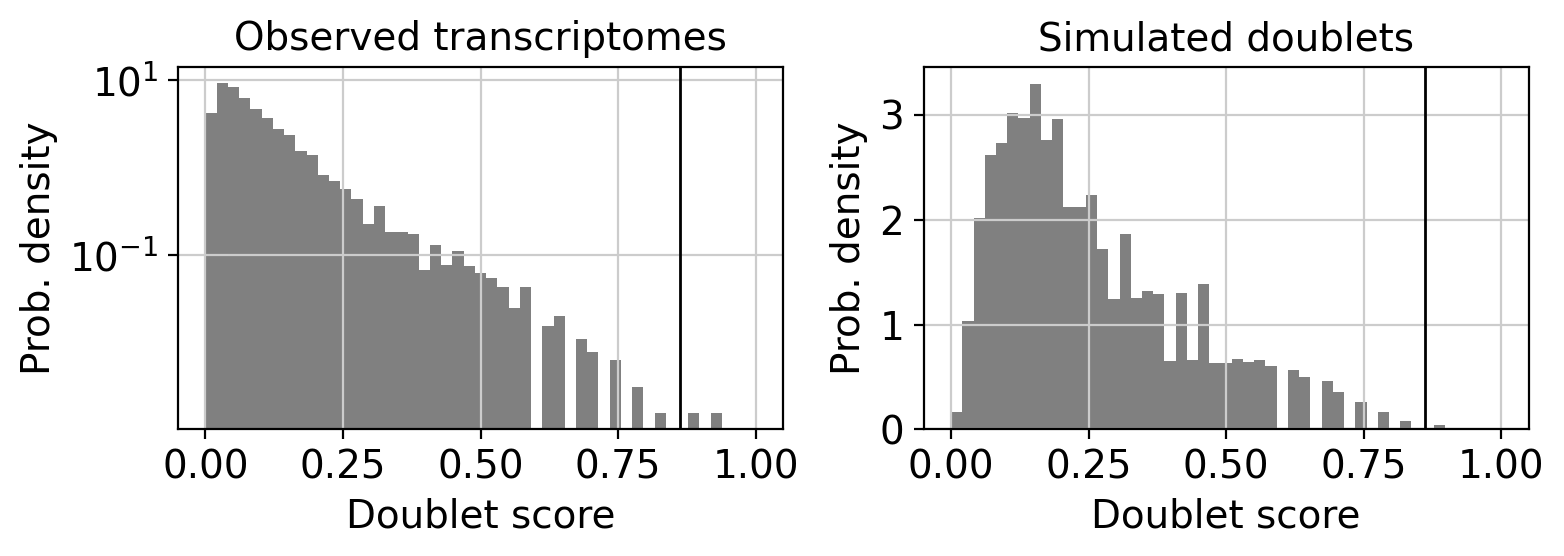

In [39]:
scrub = scr.Scrublet(adata.layers['raw'])
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [40]:
# add in column with singlet/doublet instead of True/False
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

... storing 'doublet_info' as categorical


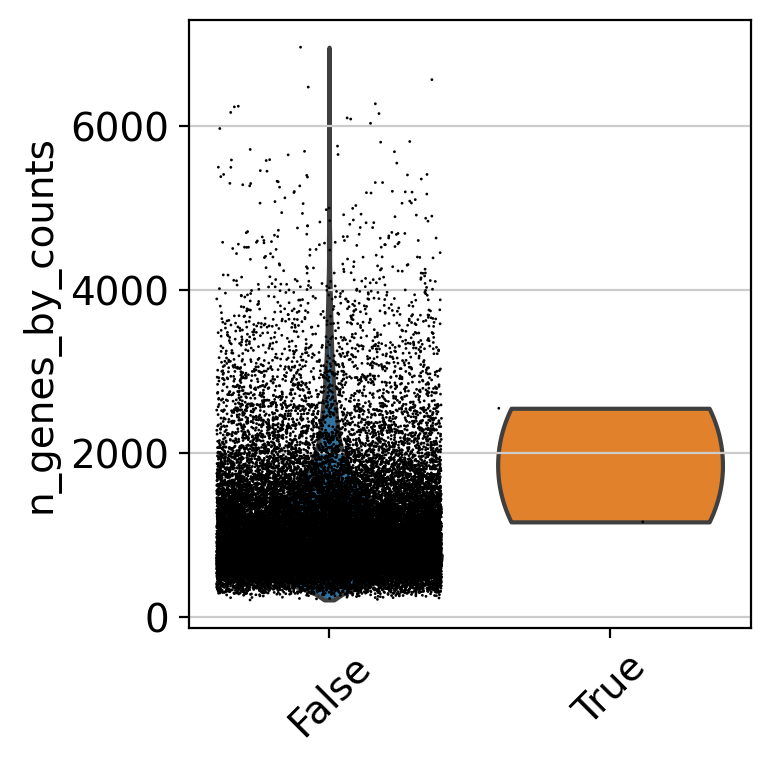

In [41]:
sc.pl.violin(adata, 'n_genes_by_counts',jitter=0.4, groupby = 'doublet_info', rotation=45)

In [42]:
adata = adata[adata.obs['doublet_info'] == "False",:]

# Processing 

In [43]:
#adata = adata[adata.obs.n_genes_by_counts < 3000, :]
# save normalized counts in raw slot.
adata.raw = adata
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata.layers['cpm'] = adata.X
# logaritmize
sc.pp.log1p(adata)
adata.layers['log1p'] = adata.X
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Filter higly variable genes
#adata.raw = adata

# scale
#sc.pp.scale(adata)

# Celltypist classification

In [44]:
sc.tl.pca(adata,svd_solver='arpack',copy=False)

In [45]:
sc.pp.neighbors(adata,n_neighbors=10, n_pcs=40)

In [46]:
sce.pp.harmony_integrate(adata, ['SampleID'])

2022-06-13 22:11:03,519 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2022-06-13 22:11:09,017 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2022-06-13 22:11:14,665 - harmonypy - INFO - Converged after 2 iterations
Converged after 2 iterations


In [47]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_pca_harmony')

In [48]:
sc.tl.umap(adata)

In [49]:
adata.obsm['X_umap_harmony'] = adata.obsm['X_umap']

In [50]:
adata

AnnData object with n_obs × n_vars = 31706 × 22310
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'ENSGeneID', 'GeneTemp-6', 'GeneTempClean-6', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs'
    layers: 'raw', 'cpm', 'log1p'
    obsp: 'distances', 'connectivities'

In [51]:
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 13
📂 Storing models in /home/lugli/spuccio/.celltypist/data/models
💾 Downloading model [1/13]: Immune_All_Low.pkl
💾 Downloading model [2/13]: Immune_All_High.pkl
💾 Downloading model [3/13]: Immune_All_PIP.pkl
💾 Downloading model [4/13]: Immune_All_AddPIP.pkl
💾 Downloading model [5/13]: COVID19_Immune_Landscape.pkl
💾 Downloading model [6/13]: Cells_Fetal_Lung.pkl
💾 Downloading model [7/13]: Cells_Intestinal_Tract.pkl
💾 Downloading model [8/13]: Cells_Lung_Airway.pkl
💾 Downloading model [9/13]: Developing_Mouse_Brain.pkl
💾 Downloading model [10/13]: Healthy_COVID19_PBMC.pkl
💾 Downloading model [11/13]: Human_Lung_Atlas.pkl
💾 Downloading model [12/13]: Nuclei_Lung_Airway.pkl
💾 Downloading model [13/13]: Pan_Fetal_Human.pkl


In [52]:
model = models.Model.load(model = 'Immune_All_High.pkl')

In [53]:
predictionsHigh = celltypist.annotate(adata, model = 'Immune_All_High.pkl', majority_voting = True)

🔬 Input data has 31706 cells and 22310 genes
🔗 Matching reference genes in the model
🧬 2772 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [54]:
adata.obs['CellCount']= adata.obs['CellCount'].astype(int)

In [55]:
adata.obs['Sample'].value_counts()

Patient32    8421
Patient30    6053
Patient31    4728
Patient35    4300
Patient33    4123
Patient34    2788
Patient29    1293
Name: Sample, dtype: int64

In [56]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_E_ImportDataFromGliomaLocati.h5ad")

In [57]:
predictionsHigh.to_adata()

AnnData object with n_obs × n_vars = 31706 × 22310
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'ENSGeneID', 'GeneTemp-6', 'GeneTempClean-6', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs

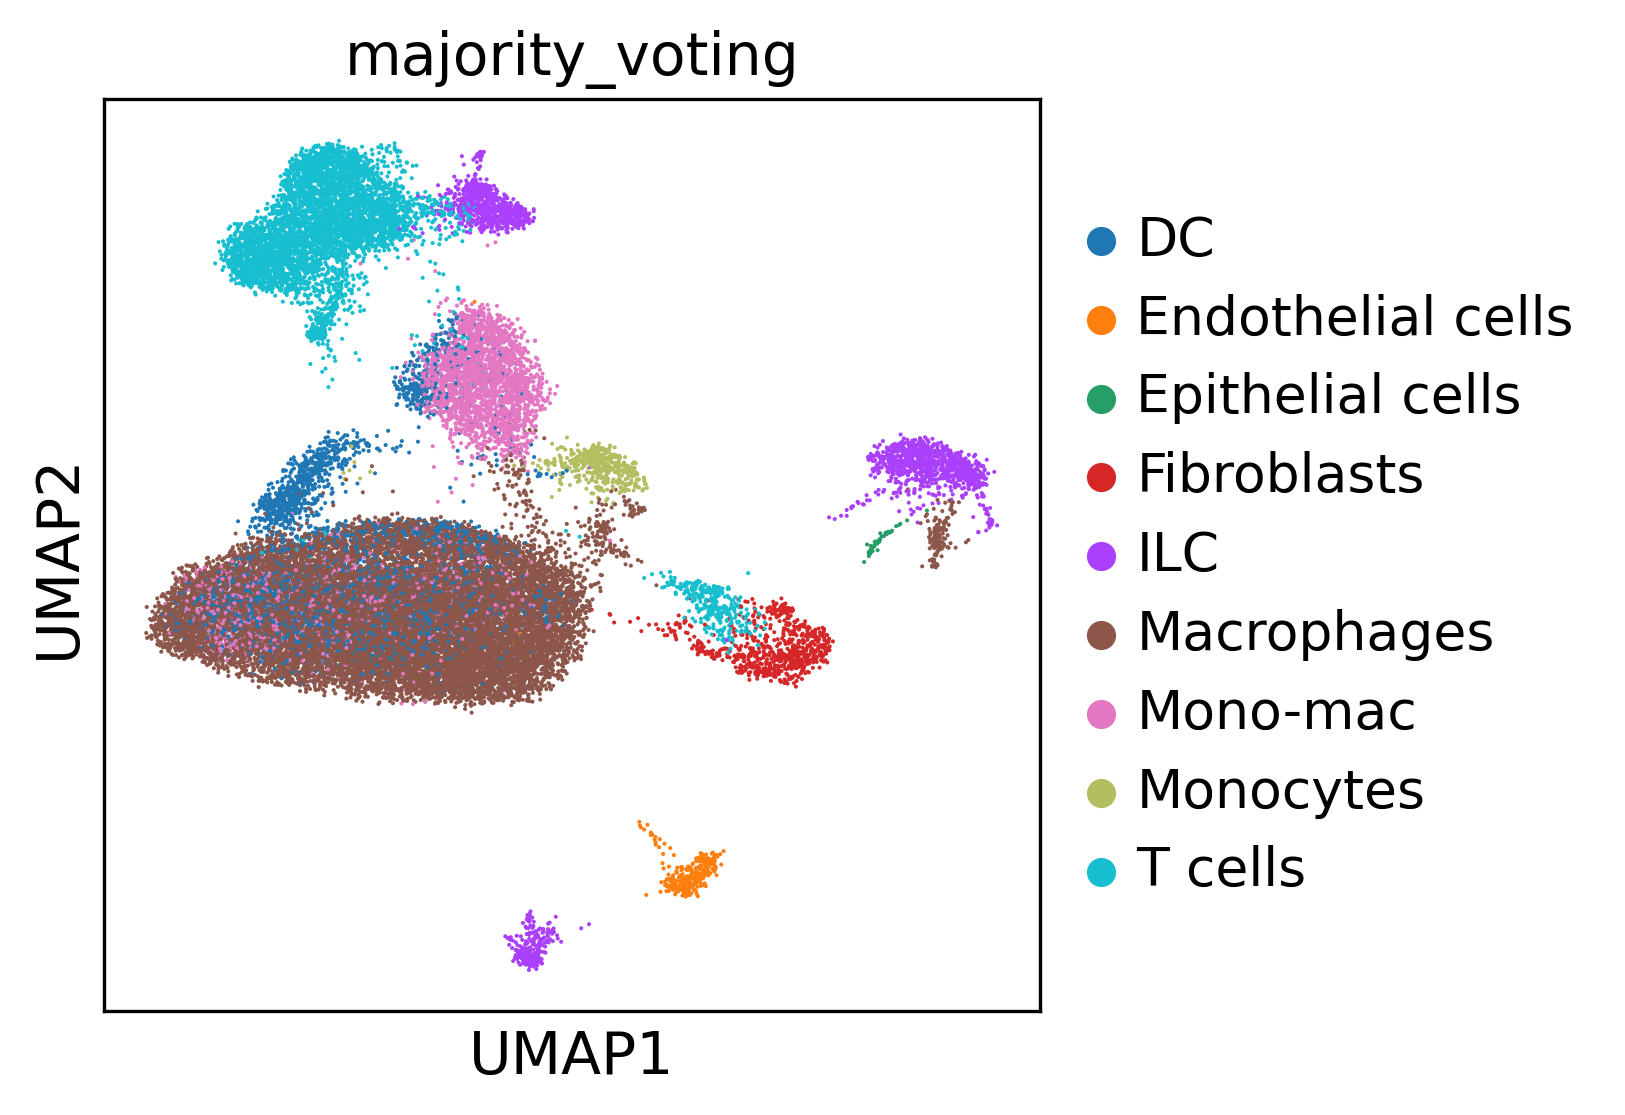

In [58]:
sc.set_figure_params(dpi=150)
sc.pl.umap(predictionsHigh.to_adata(), color='majority_voting')

# PangaDB classification

In [59]:
adata = adata[:, adata.var.highly_variable]

In [60]:
markers = dc.get_resource('PanglaoDB')
markers

label genesymbol canonical_marker         cell_type germ_layer human  \
0          CTRB1            False       Enterocytes   Endoderm  True   
1          CTRB1             True      Acinar cells   Endoderm  True   
2           KLK1             True      Acinar cells   Endoderm  True   
3           KLK1            False      Goblet cells   Endoderm  True   
4           KLK1            False  Epithelial cells   Mesoderm  True   
...          ...              ...               ...        ...   ...   
8472     SLC14A1             True  Urothelial cells   Mesoderm  True   
8473       UPK3A             True  Urothelial cells   Mesoderm  True   
8474       UPK1A             True  Urothelial cells   Mesoderm  True   
8475        UPK2             True  Urothelial cells   Mesoderm  True   
8476       UPK3B             True  Urothelial cells   Mesoderm  True   

label human_sensitivity human_specificity mouse mouse_sensitivity  \
0                   0.0        0.00439422  True        0.00331126   
1                   1.0       0.000628931  True          0.957143   
2              0.833333        0.00503145  True          0.314286   
3              0.588235        0.00503937  True          0.903226   
4                   0.0        0.00823306  True          0.225806   
...                 ...               ...   ...               ...   
8472                0.0         0.0181704  True               0.0   
8473                0.0               0.0  True               0.0   
8474                0.0               0.0  True               0.0   
8475                0.0               0.0  True               0.0   
8476                0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
0             0.0204803        9606         GI tract           0.017  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
3             0.0124084        9606         GI tract           0.013  
4             0.0137585        9606       Epithelium           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[8477 rows x 13 columns]

In [ ]:
markers['organ'].value_counts()

In [61]:
# Filter by canonical_marker and human
markers = markers[(markers['human']=='True')&(markers['canonical_marker']=='True')]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]
markers

label genesymbol canonical_marker                     cell_type germ_layer  \
1          CTRB1             True                  Acinar cells   Endoderm   
2           KLK1             True                  Acinar cells   Endoderm   
5           KLK1             True               Principal cells   Mesoderm   
7           KLK1             True  Plasmacytoid dendritic cells   Mesoderm   
8           KLK1             True             Endothelial cells   Mesoderm   
...          ...              ...                           ...        ...   
8472     SLC14A1             True              Urothelial cells   Mesoderm   
8473       UPK3A             True              Urothelial cells   Mesoderm   
8474       UPK1A             True              Urothelial cells   Mesoderm   
8475        UPK2             True              Urothelial cells   Mesoderm   
8476       UPK3B             True              Urothelial cells   Mesoderm   

label human human_sensitivity human_specificity mouse mouse_sensitivity  \
1      True               1.0       0.000628931  True          0.957143   
2      True          0.833333        0.00503145  True          0.314286   
5      True               0.0        0.00814536  True          0.285714   
7      True               0.0        0.00820189  True               1.0   
8      True               0.0        0.00841969  True               0.0   
...     ...               ...               ...   ...               ...   
8472   True               0.0         0.0181704  True               0.0   
8473   True               0.0               0.0  True               0.0   
8474   True               0.0               0.0  True               0.0   
8475   True               0.0               0.0  True               0.0   
8476   True               0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
5             0.0140583        9606           Kidney           0.013  
7             0.0129136        9606    Immune system           0.013  
8             0.0149153        9606      Vasculature           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[5180 rows x 13 columns]

In [62]:
# Run leiden clustering algorithm
sc.tl.leiden(adata)

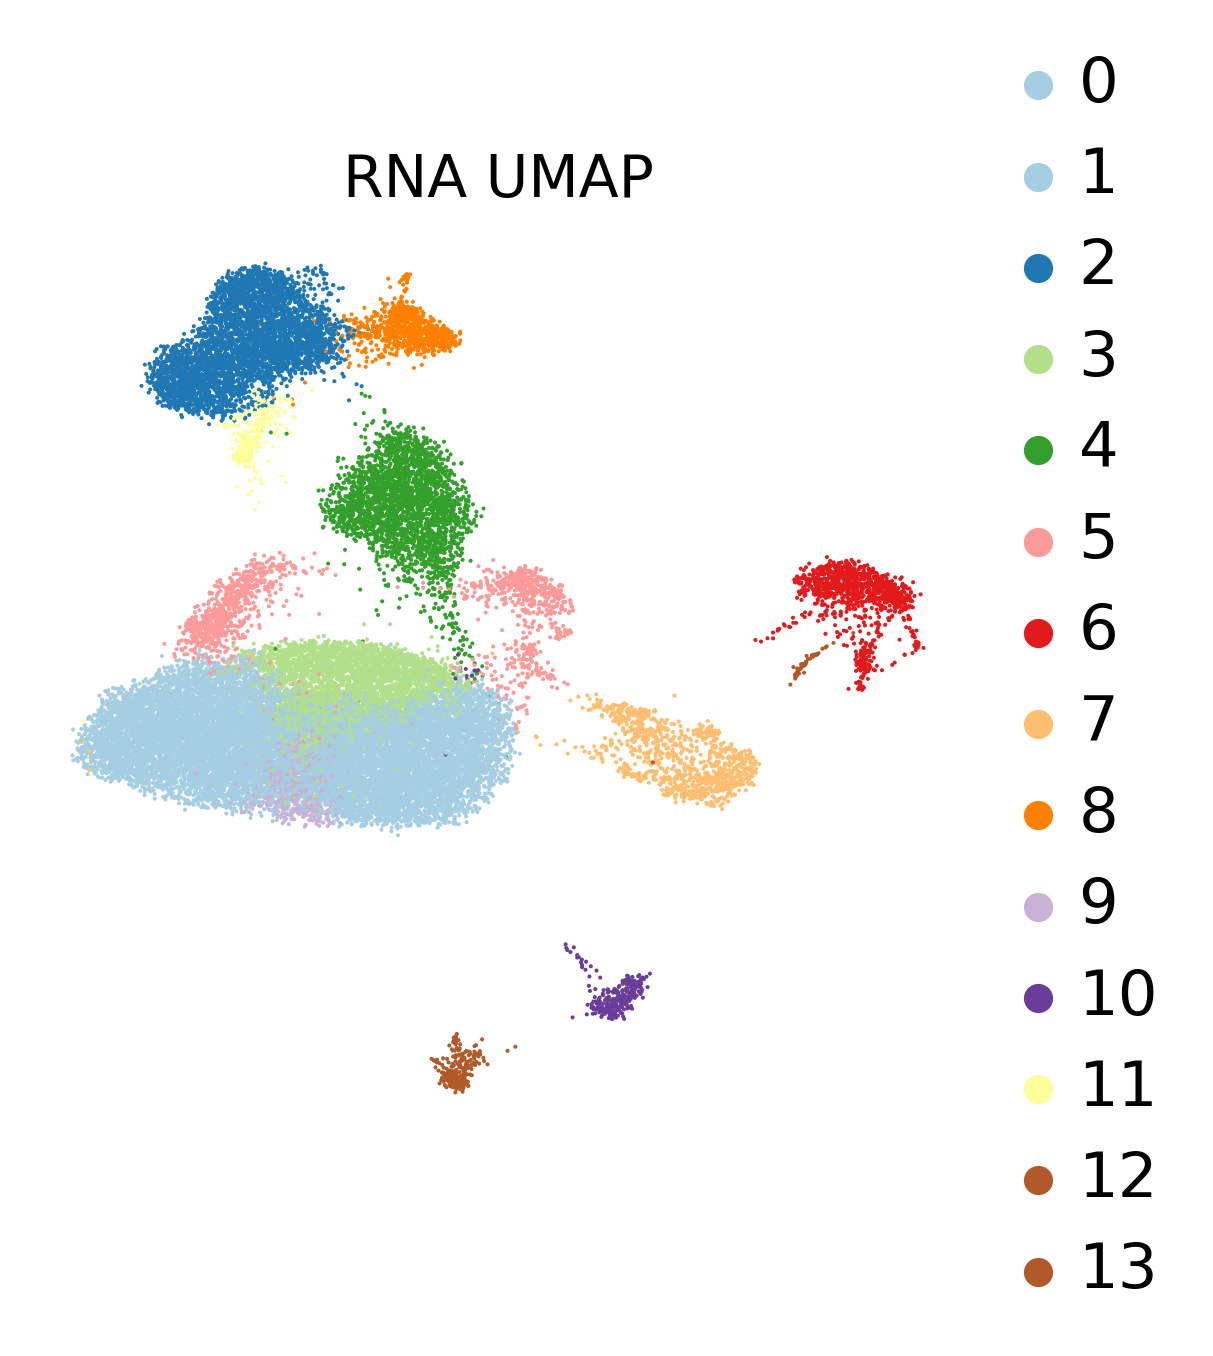

In [63]:
# Visualize
sc.pl.umap(adata, color='leiden', title='RNA UMAP',palette='Paired',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

In [64]:
dc.run_ora(mat=adata, net=markers, source='cell_type', target='genesymbol', min_n=3, verbose=True,use_raw=False)

Running ora on mat with 31706 samples and 2396 targets for 101 sources.


100%|██████████| 31706/31706 [00:09<00:00, 3176.95it/s]


In [65]:
adata.obsm['ora_estimate']

source        Acinar cells  Adipocytes  Alpha cells  Alveolar macrophages  \
GLIO1_T-0         -0.00000    1.011954         -0.0             -0.000000   
GLIO1_T-1         -0.00000   -0.000000         -0.0              1.747314   
GLIO1_T-2          1.23345    1.011954         -0.0             -0.000000   
GLIO1_T-3          1.23345   -0.000000         -0.0             -0.000000   
GLIO1_T-4          1.23345    1.011954         -0.0             -0.000000   
...                    ...         ...          ...                   ...   
GLIO7_T-4523      -0.00000    2.339365         -0.0              1.747314   
GLIO7_T-4524      -0.00000    1.011954         -0.0              1.747314   
GLIO7_T-4525      -0.00000   -0.000000         -0.0             -0.000000   
GLIO7_T-4527      -0.00000    2.339365         -0.0              1.747314   
GLIO7_T-4528      -0.00000    1.011954         -0.0              1.747314   

source        Astrocytes   B cells  B cells memory  B cells naive  Basophils  \
GLIO1_T-0       0.925273  0.925273        1.976291       1.944561  -0.000000   
GLIO1_T-1       2.157480  3.586867        0.838852       1.944561   5.928948   
GLIO1_T-2       2.157480  0.925273        3.305246       1.944561   1.092446   
GLIO1_T-3       0.925273  2.157480        3.305246       1.944561  -0.000000   
GLIO1_T-4       0.925273  0.925273        3.305246       1.944561  -0.000000   
...                  ...       ...             ...            ...        ...   
GLIO7_T-4523    0.925273  3.586867        1.976291       1.944561   5.928948   
GLIO7_T-4524    2.157480  3.586867        3.305246       4.711303   2.508758   
GLIO7_T-4525    0.925273  2.157480        1.976291       1.944561   2.508758   
GLIO7_T-4527    2.157480  2.157480       -0.000000      -0.000000   4.136296   
GLIO7_T-4528    0.925273  3.586867        3.305246       1.944561   2.508758   

source        Bergmann glia  ...  Sebocytes  Sertoli cells  \
GLIO1_T-0          -0.00000  ...  -0.000000           -0.0   
GLIO1_T-1           2.80777  ...  -0.000000           -0.0   
GLIO1_T-2          -0.00000  ...  -0.000000           -0.0   
GLIO1_T-3          -0.00000  ...  -0.000000           -0.0   
GLIO1_T-4          -0.00000  ...  -0.000000           -0.0   
...                     ...  ...        ...            ...   
GLIO7_T-4523        1.23345  ...  -0.000000           -0.0   
GLIO7_T-4524        1.23345  ...   1.623667           -0.0   
GLIO7_T-4525       -0.00000  ...  -0.000000           -0.0   
GLIO7_T-4527        1.23345  ...  -0.000000           -0.0   
GLIO7_T-4528        1.23345  ...  -0.000000           -0.0   

source        Smooth muscle cells    T cells  T helper cells  \
GLIO1_T-0                1.914068   0.659852       -0.000000   
GLIO1_T-1                1.914068  18.989588        1.327791   
GLIO1_T-2                1.914068   0.659852       -0.000000   
GLIO1_T-3                1.914068   0.659852       -0.000000   
GLIO1_T-4                1.914068  -0.000000       -0.000000   
...                           ...        ...             ...   
GLIO7_T-4523            -0.000000  20.957510        3.010411   
GLIO7_T-4524            -0.000000  31.522228        3.010411   
GLIO7_T-4525             3.208672   2.720888        1.327791   
GLIO7_T-4527            13.331388   1.599668        1.327791   
GLIO7_T-4528             0.809191  31.522228        3.010411   

source        T regulatory cells  Tanycytes  Taste receptor cells  Thymocytes  \
GLIO1_T-0               1.623667  -0.000000                  -0.0    1.193340   
GLIO1_T-1              -0.000000  -0.000000                  -0.0    2.722325   
GLIO1_T-2              -0.000000  -0.000000                  -0.0    1.193340   
GLIO1_T-3               1.623667  -0.000000                  -0.0    1.193340   
GLIO1_T-4               1.623667  -0.000000                  -0.0    1.193340   
...                          ...        ...                   ...         ...   
GLIO7_T-4523           -0.000000 

In [66]:
adata.obsm['ora_estimate'].columns

Index(['Acinar cells', 'Adipocytes', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive', 'Basophils',
       'Bergmann glia',
       ...
       'Sebocytes', 'Sertoli cells', 'Smooth muscle cells', 'T cells',
       'T helper cells', 'T regulatory cells', 'Tanycytes',
       'Taste receptor cells', 'Thymocytes', 'Tuft cells'],
      dtype='object', name='source', length=101)

In [67]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')
acts

AnnData object with n_obs × n_vars = 31706 × 101
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony', 'ora_estimate', 'ora_pvals'

In [68]:
mean_enr = dc.summarize_acts(acts, groupby='leiden', min_std=1)
mean_enr

Astrocytes   B cells  B cells memory  B cells naive  Bergmann glia  \
0     1.271214  1.339720        1.363010       1.057611       0.284394   
1     1.260759  1.161025        1.292530       0.962380       0.444762   
10    1.759269  0.206450        0.371062       0.389903       1.514432   
11    1.821931  6.844719        6.008045       7.256640       0.483276   
12    2.004266  0.336843        0.353548       0.595036       1.667765   
13    6.373477  0.163283        0.000000       0.016151       4.780851   
2     1.780192  3.915684        3.148937       2.864931       1.241268   
3     1.185201  1.137611        1.255014       0.948052       0.292656   
4     1.298838  3.882346        3.025686       2.814306       1.318100   
5     2.202145  1.757769        1.398754       1.296914       1.252743   
6     3.466146  0.199666        0.195219       0.187052       1.408292   
7     5.274315  0.480939        0.254581       0.275173       5.006905   
8     1.453032  2.598834        1.915695       1.712871       1.272286   
9     1.135969  0.940821        0.954921       0.715247       0.158035   

    Dendritic cells  Endothelial cells  Eosinophils  Ependymal cells  \
0          3.859276           2.555120     1.783942         0.157558   
1          5.727252           2.300601     2.942712         0.275443   
10         1.348889          30.614704     0.463474         0.630398   
11         3.420906           2.060609     1.607391         0.036572   
12         1.673626          10.623765     0.298517         0.887282   
13         2.390054           4.308761     0.085303         2.943994   
2          5.155322           1.226932     3.303576         0.043118   
3          4.505783           2.235377     2.457311         0.218148   
4          9.247531           1.832682     4.780811         0.151373   
5         10.621216           3.057864     1.795356         0.179595   
6          2.763821           4.091929     0.505752         2.702096   
7          2.266891           3.360523     0.483172         1.731611   
8          4.063613           1.378843     2.819002         0.068011   
9          3.036036           2.450391     1.730692         0.113771   

    Fibroblasts  ...  Plasmacytoid dendritic cells  Platelets  Schwann cells  \
0      1.471941  ...                      1.556394   2.145300       1.431544   
1      2.085034  ...                      2.991980   4.011584       1.238125   
10     4.334439  ...                      0.349542   5.269633       1.442956   
11     2.191233  ...                      2.644136   2.852964       1.174387   
12    13.774307  ...                      0.218298   6.743100       2.506953   
13     1.394746  ...                      0.088106   2.745236      17.803020   
2      3.091581  ...                      2.668641   5.167007       0.702920   
3      1.729526  ...                      2.295307   2.945495       1.296422   
4      3.062743  ...                      3.623650   6.725095       0.464592   
5      3.773885  ...                      2.590935   4.243401       1.506994   
6      0.657261  ...                      0.420654   3.121365      19.184734   
7      2.846358  ...                      0.542922   2.945221       5.196865   
8      2.865819  ...                      2.437861   4.587666       0.778615   
9      1.636402  ...                      1.960177   2.002889       1.332135   

    Sertoli cells  Smooth muscle cells    T cells  T helper cells  Tanycytes  \
0        0.037981             2.798510   1.086253        0.539768   0.137828   
1        0.053557             2.521930   1.799647        0.663978   0.284036   
10       0.907669             1.837999   0.891576        0.202347   0.753065   
11       0.082084             1.950682   6.870104        1.361329   0.069295   
12       0.166748            10.159785   0.822991        0.100146   3.226728   
13       4.487087             0.412529   0.234487        0.026035   2.418819   
2        0.116468             1.307356  23.951551  

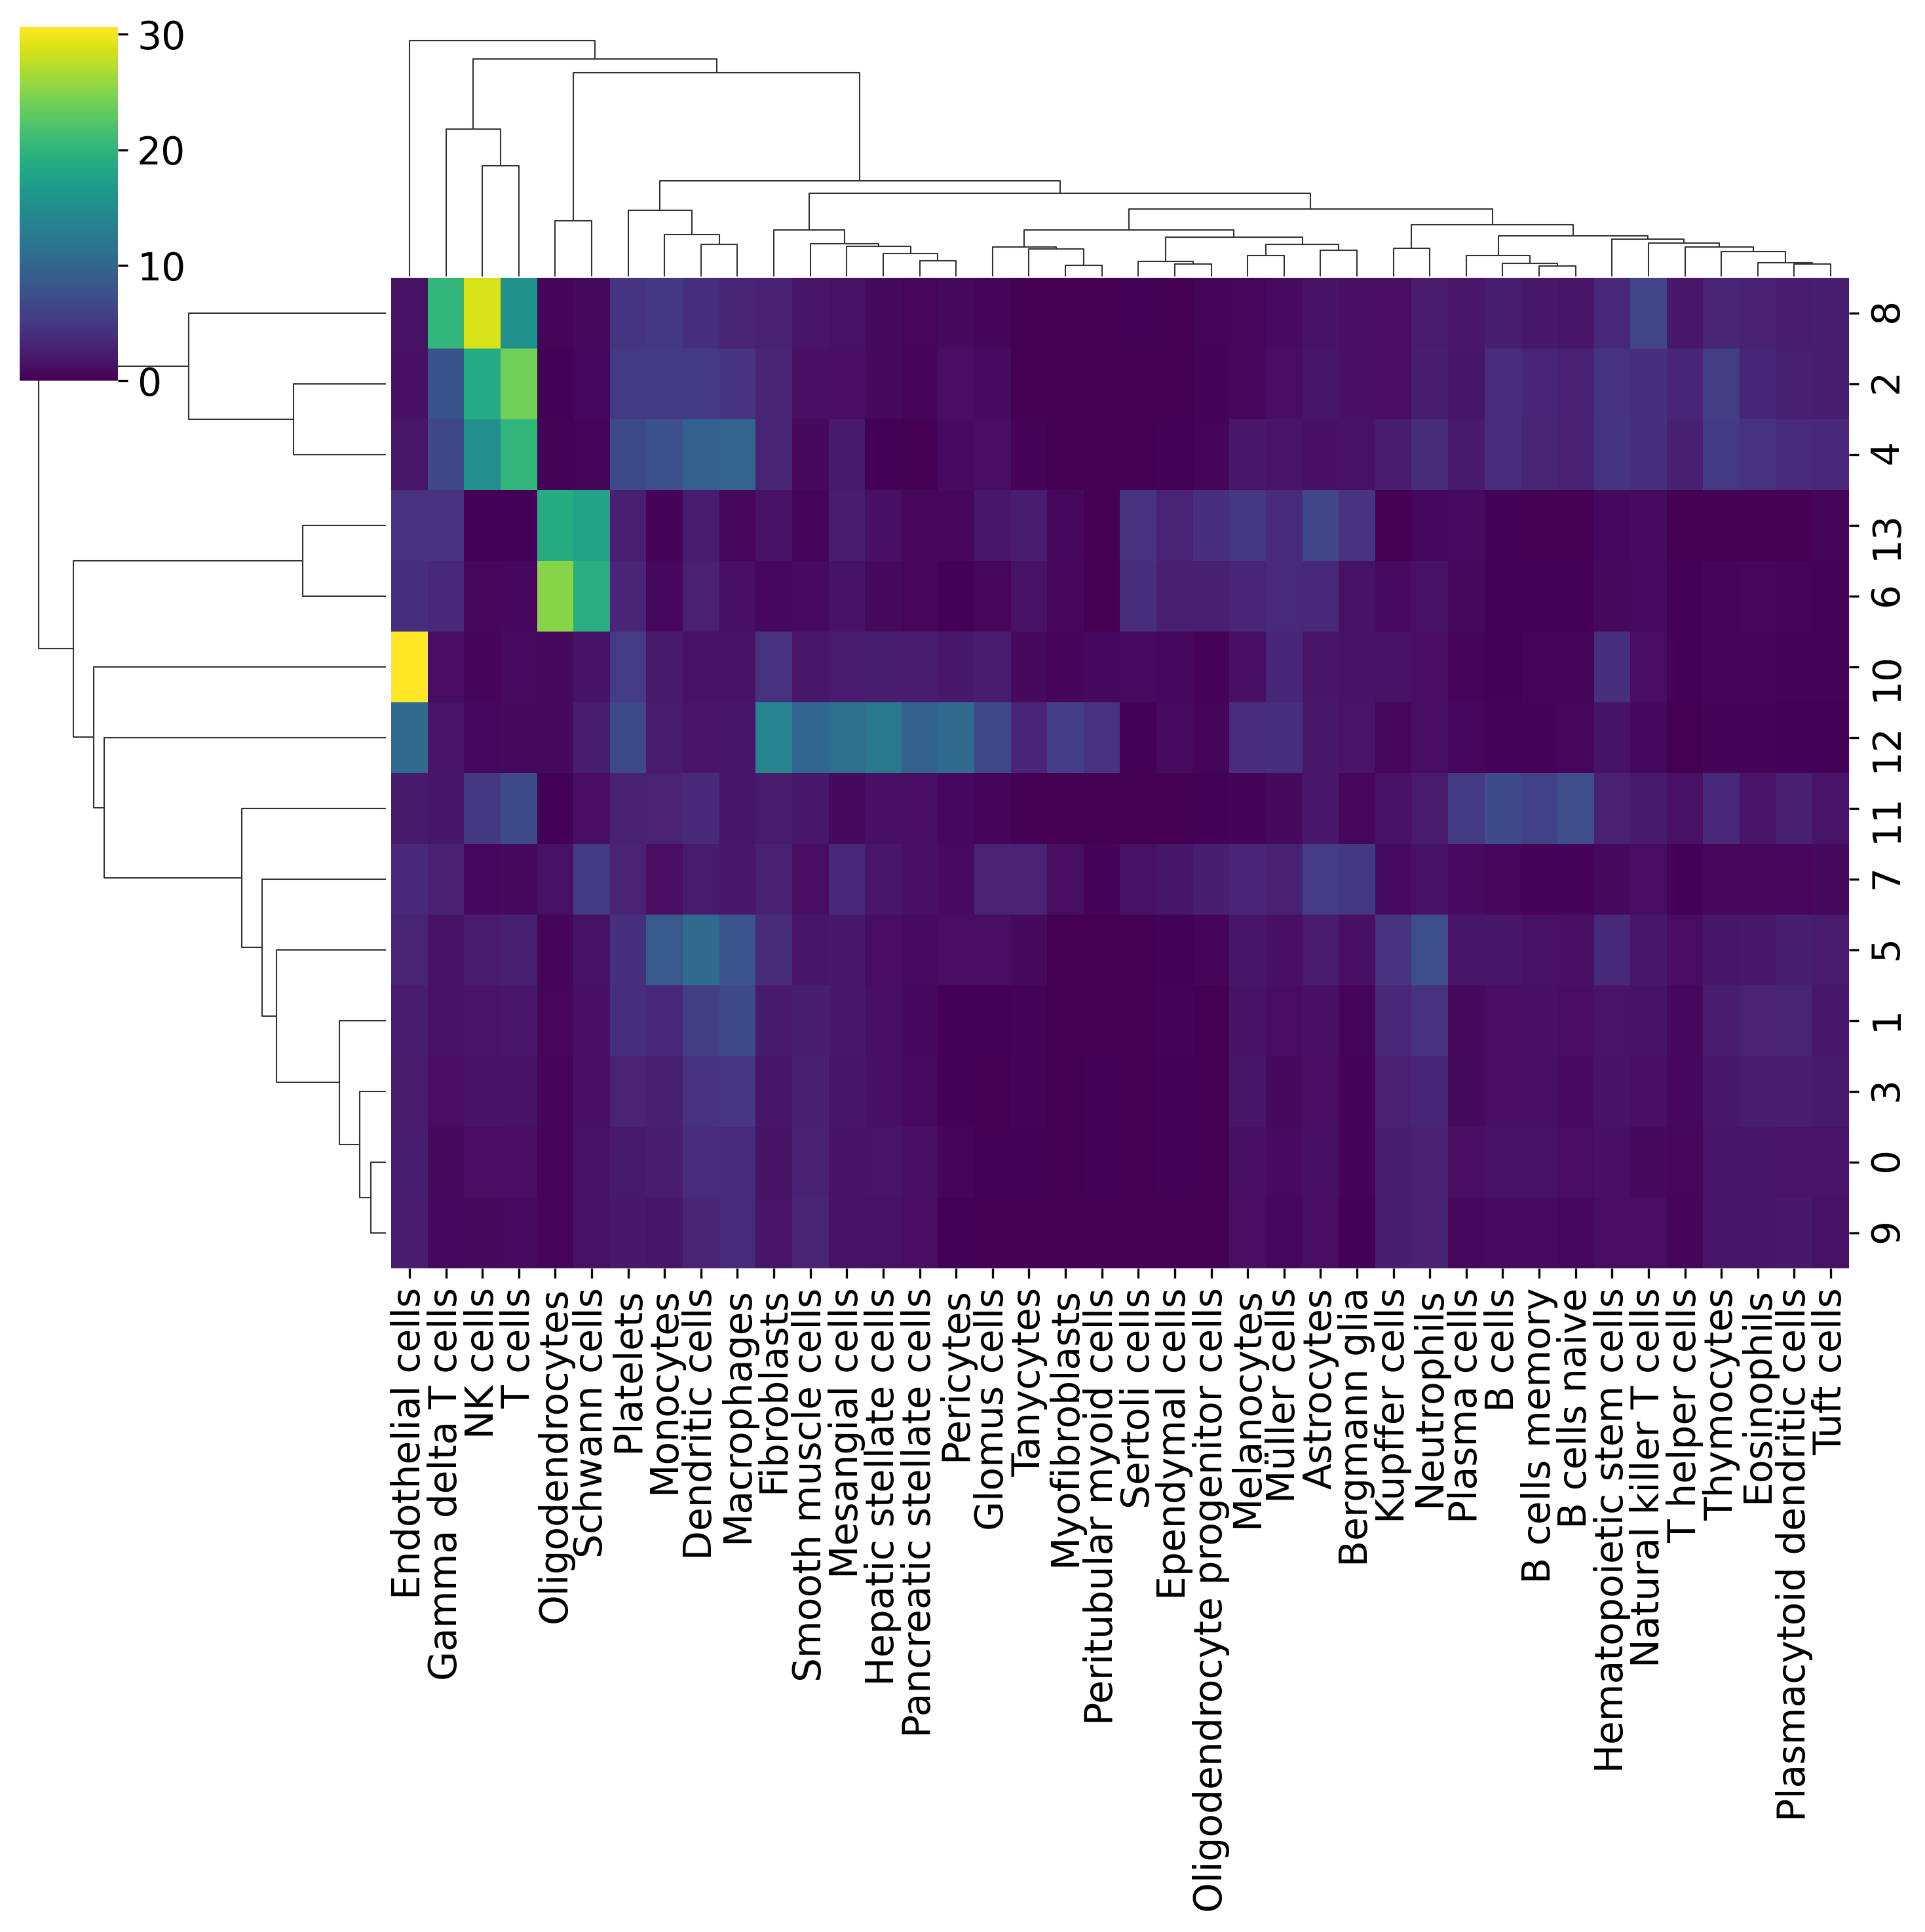

In [69]:
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, cmap='viridis')
plt.show()

In [70]:
annotation_dict = dc.assign_groups(mean_enr)
annotation_dict

{'0': 'Dendritic cells',
 '1': 'Macrophages',
 '10': 'Endothelial cells',
 '11': 'B cells naive',
 '12': 'Fibroblasts',
 '13': 'Oligodendrocytes',
 '2': 'T cells',
 '3': 'Macrophages',
 '4': 'T cells',
 '5': 'Dendritic cells',
 '6': 'Oligodendrocytes',
 '7': 'Astrocytes',
 '8': 'NK cells',
 '9': 'Macrophages'}

... storing 'cell_type' as categorical


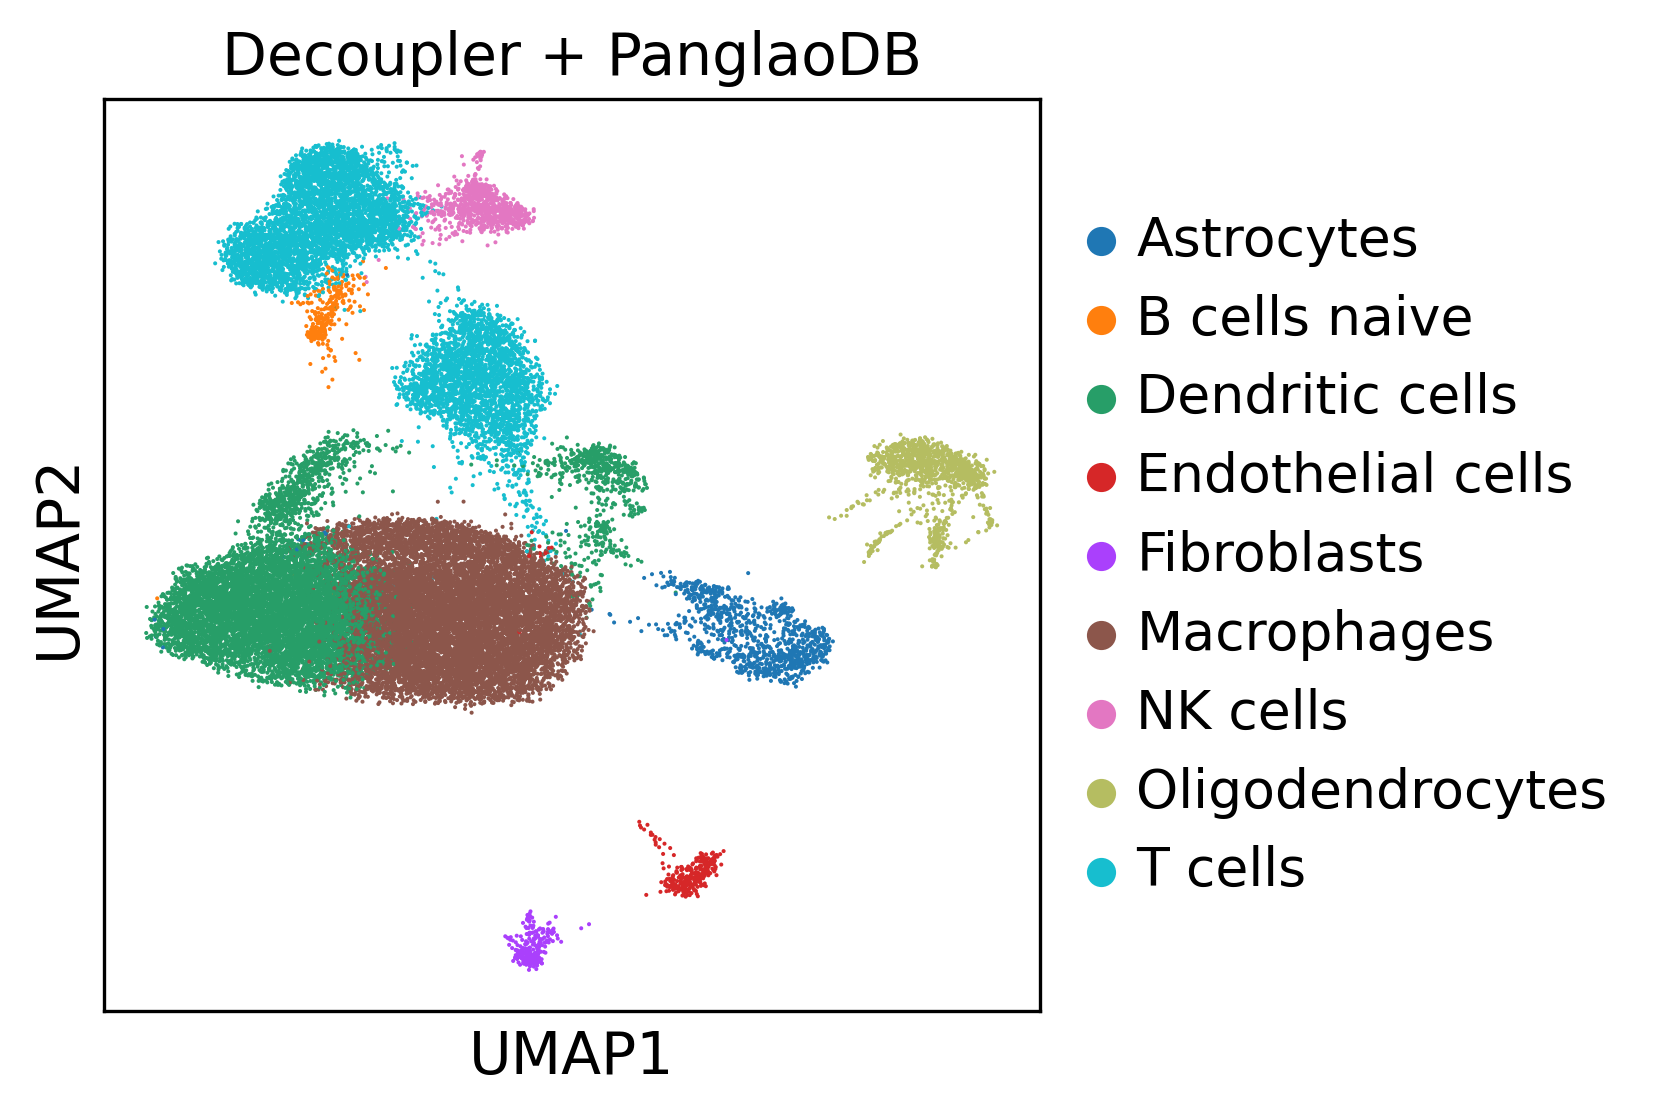

In [71]:
# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[clust] for clust in adata.obs['leiden']]

# Visualize
sc.pl.umap(adata, color='cell_type',title='Decoupler + PanglaoDB')

In [72]:
adata

AnnData object with n_obs × n_vars = 31706 × 2396
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden', 'cell_type'
    var: 'ENSGeneID', 'GeneTemp-6', 'GeneTempClean-6', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors', 'cell_type_

In [73]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_E_ImportDataFromGliomaLocati.h5ad")